In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('mcdonalds_modified.csv')

In [3]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [4]:
# Clustering without Standardizing Data

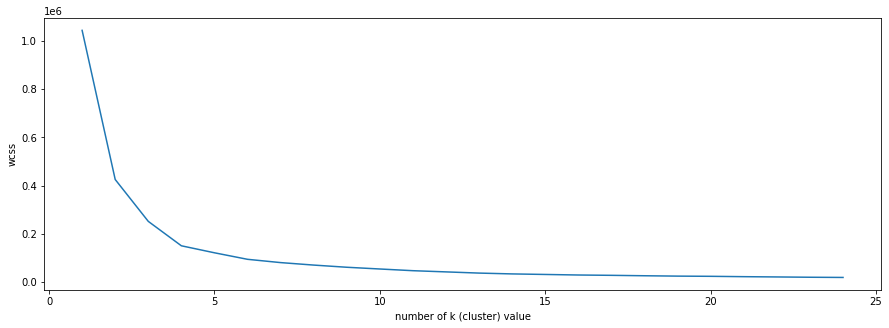

In [5]:
# K Means Clustering:

# Finding the best number of clusters using elbow method

wcss = []
for k in range(1,25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1,25),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

# The best value for number of clusters i.e. is k = 4

In [6]:
# K Means model
kmeans = KMeans(n_clusters=4)
data_predict = kmeans.fit_predict(data)
labels=kmeans.labels_

clusters=pd.concat([data, pd.DataFrame({'kmeans_cluster':labels})], axis=1)
clusters.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year,Gender,kmeans_cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,48,0,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,1,0


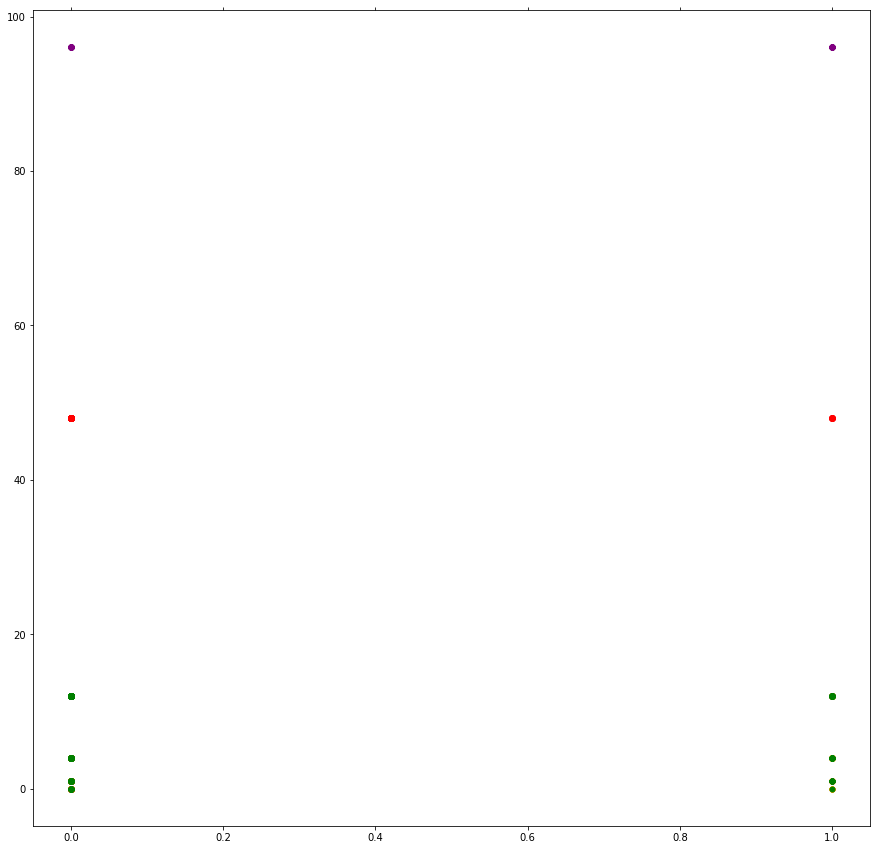

In [9]:
y,x = clusters['Visits/year'], clusters['healthy'] 

colors = {0: 'orange',
          1: 'red',
          2: 'green', 
          3: 'purple'
            }

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig = plt.figure(figsize=(15,15))
ax = plt.axes() 

for name, group in groups:
    ax.plot(group.x, group.y,marker='o', linestyle='', ms=5,
            color=colors[name])
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    

plt.show()

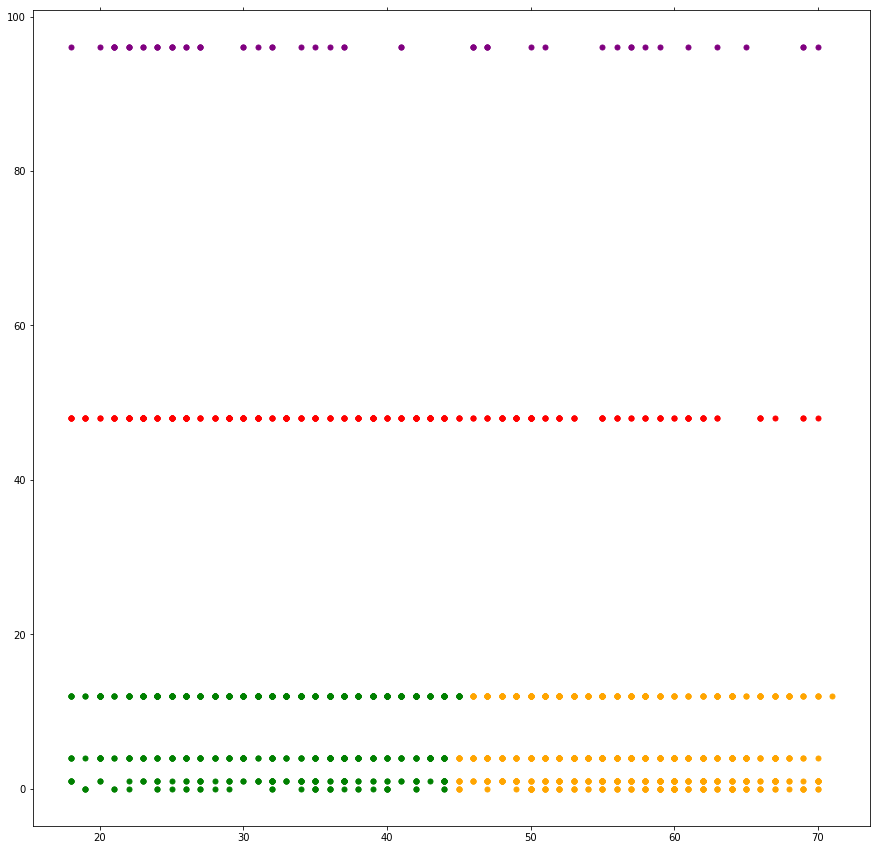

In [10]:
y,x = clusters['Visits/year'], clusters['Age'] 

colors = {0: 'orange',
          1: 'red',
          2: 'green', 
          3: 'purple'
            }

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig = plt.figure(figsize=(15,15))
ax = plt.axes() 

for name, group in groups:
    ax.plot(group.x, group.y,marker='o', linestyle='', ms=5,
            color=colors[name])
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    

plt.show()

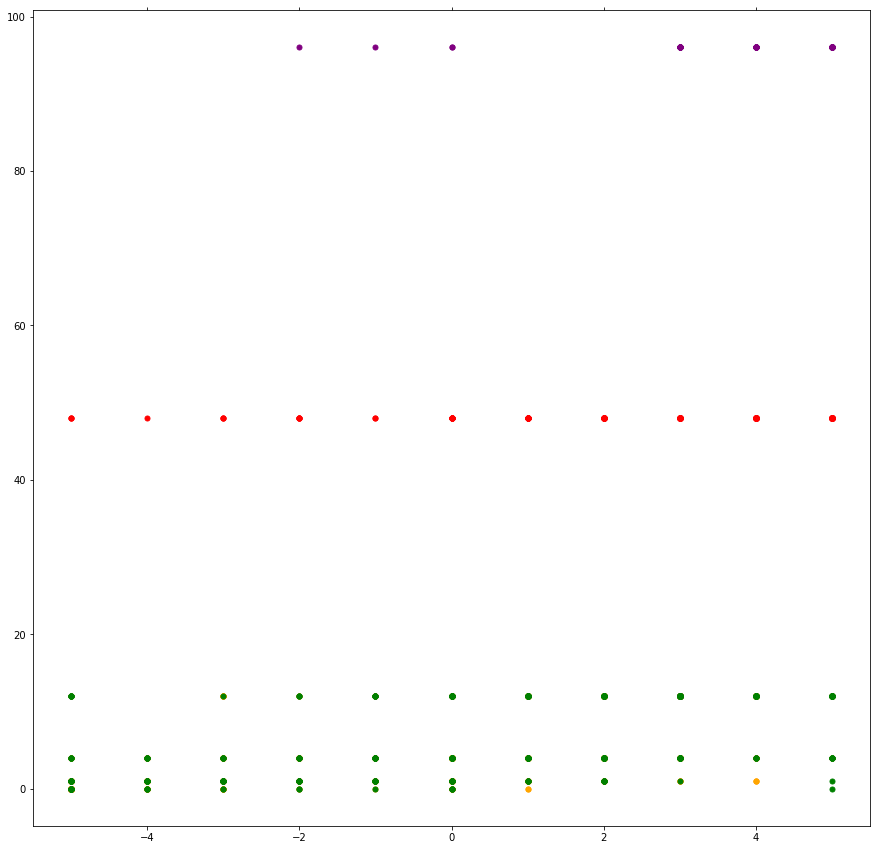

In [12]:
x, y = clusters['Like'], clusters['Visits/year'] 

colors = {0: 'orange',
          1: 'red',
          2: 'green', 
          3: 'purple'
            }

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig = plt.figure(figsize=(15,15))
ax = plt.axes() 

for name, group in groups:
    ax.plot(group.x, group.y,marker='o', linestyle='', ms=5,
            color=colors[name])
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    

plt.show()

In [13]:
# Using PCA for visualizing the clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)
X_PCA = pca.transform(data)
X_PCA.shape

(1453, 3)

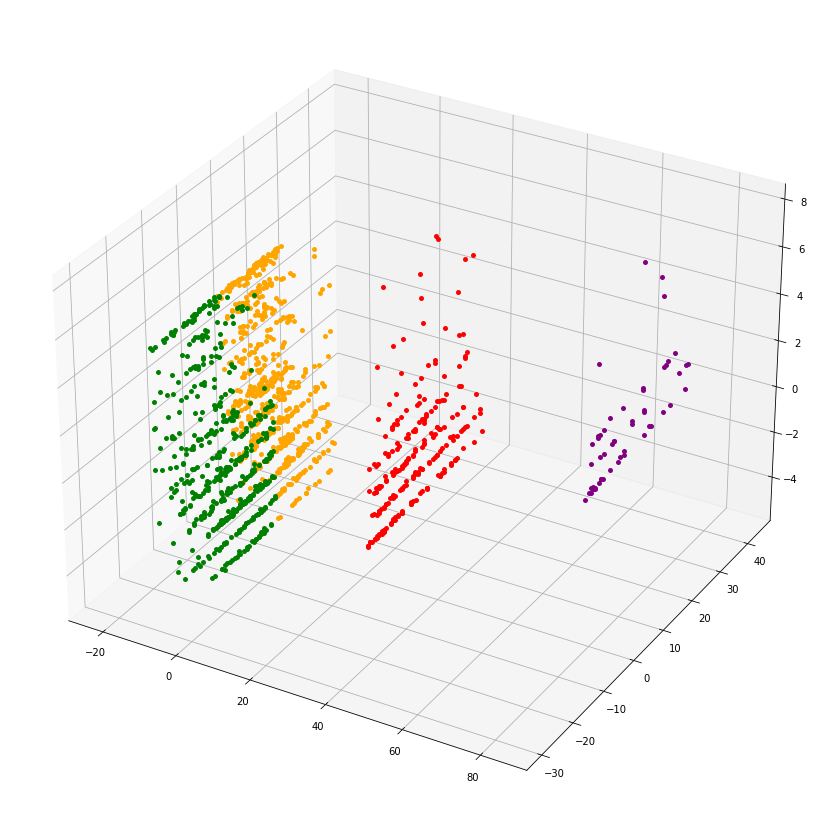

In [14]:
x, y, z = X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2] 

colors = {0: 'orange',
          1: 'red',
          2: 'green', 
          3: 'purple'
            }

df = pd.DataFrame({'x': x, 'y':y, 'z':z, 'label':labels}) 
groups = df.groupby('label')

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection ='3d') 

for name, group in groups:
    ax.plot(group.x, group.y, group.z,marker='o', linestyle='', ms=5,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    

plt.show()

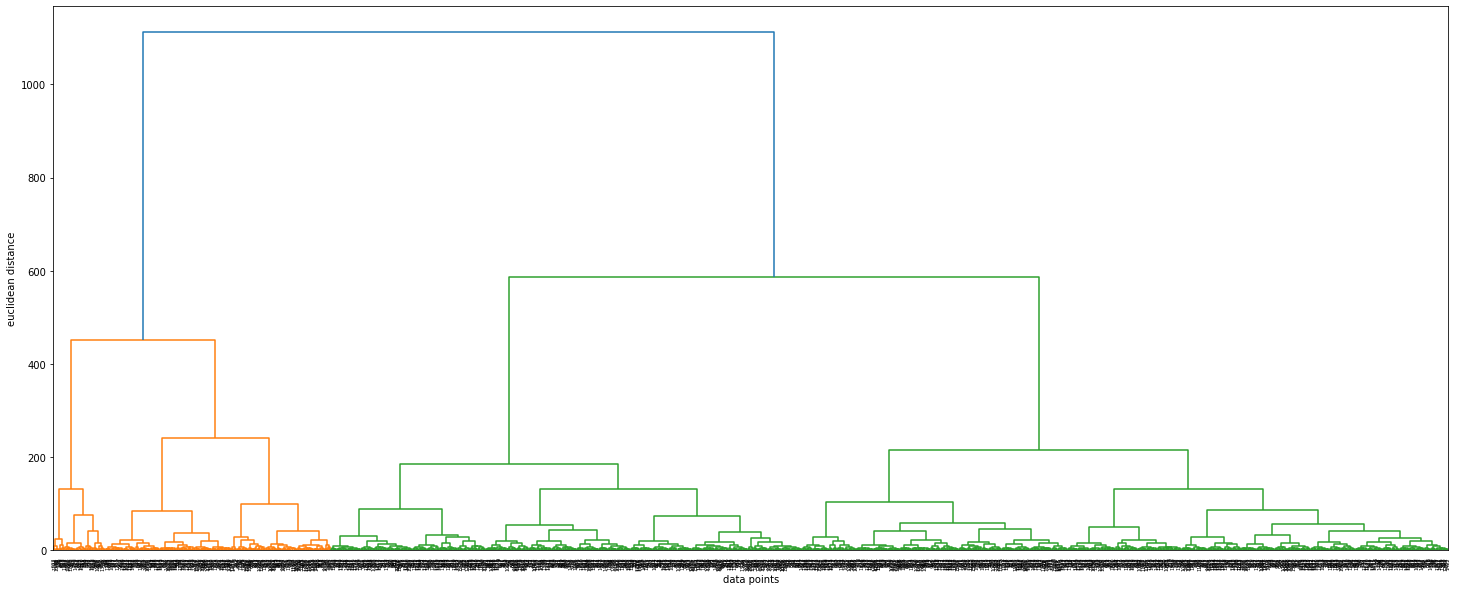

In [15]:
# Hierarchical Clustering

merg = linkage(data,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [16]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 4,affinity= "euclidean",linkage = "ward")
data_predict = hierarchical_cluster.fit_predict(data)
labels=hierarchical_cluster.labels_

clusters=pd.concat([clusters, pd.DataFrame({'hierarchical_clusters':labels})], axis=1)
clusters.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year,Gender,kmeans_cluster,hierarchical_clusters
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,48,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,1,0,1


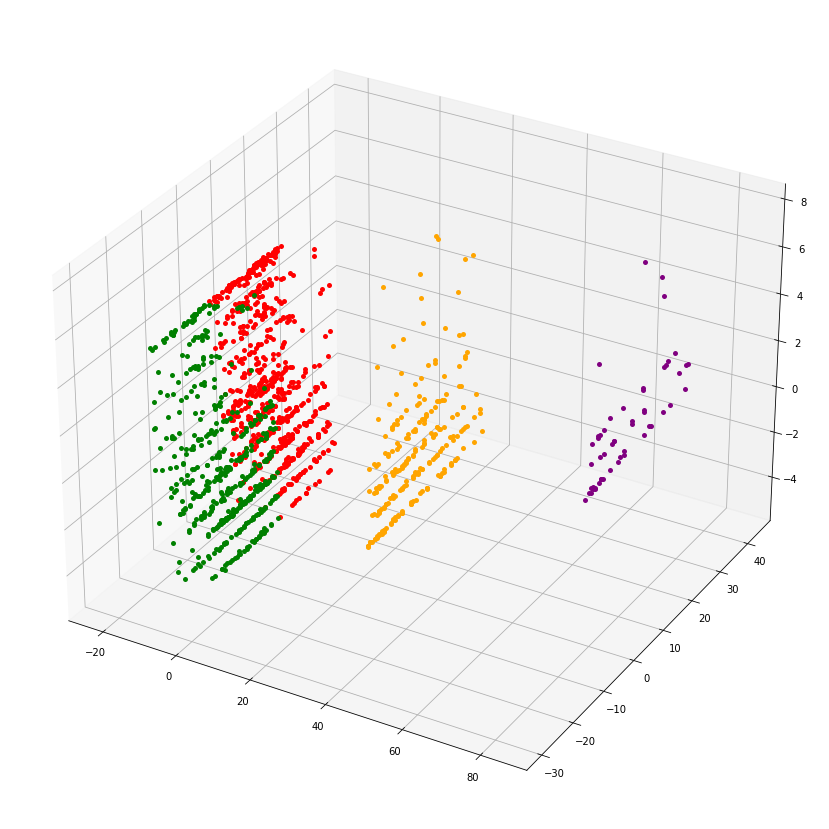

In [17]:
x, y, z = X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2] 

colors = {0: 'orange',
          1: 'red',
          2: 'green', 
          3: 'purple'
            }

df = pd.DataFrame({'x': x, 'y':y, 'z':z, 'label':labels}) 
groups = df.groupby('label')

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection ='3d') 

for name, group in groups:
    ax.plot(group.x, group.y, group.z,marker='o', linestyle='', ms=5,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    

plt.show()

In [ ]:
# Clustering without Standardizing Data

In [59]:
from sklearn.preprocessing import normalize

scaled_data = normalize(X=data, axis=0)

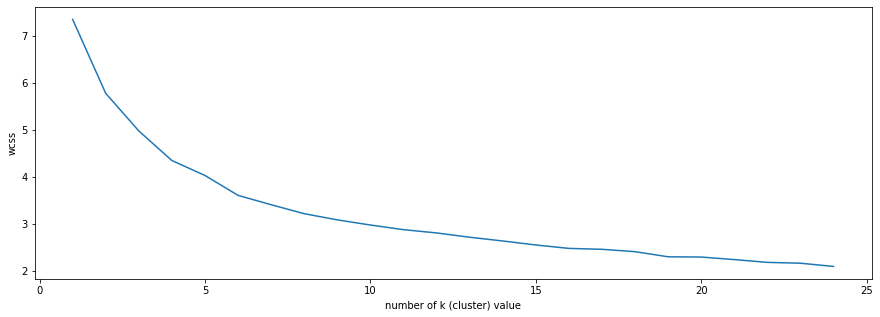

In [60]:
# K Means Clustering:

# Finding the best number of clusters using elbow method

wcss = []
for k in range(1,25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1,25),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

# The best value for number of clusters i.e. is k = 4

In [62]:
# K Means model
kmeans = KMeans(n_clusters=4)
data_predict = kmeans.fit_predict(scaled_data)
labels=kmeans.labels_

clusters=pd.concat([data, pd.DataFrame({'kmeans_cluster_scaled_data':labels})], axis=1)
clusters.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year,Gender,kmeans_cluster_scaled_data
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0,3
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,0,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,48,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,1,0


In [63]:
# Using PCA for visualizing the clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_data)
X_PCA = pca.transform(scaled_data)
X_PCA.shape

(1453, 3)

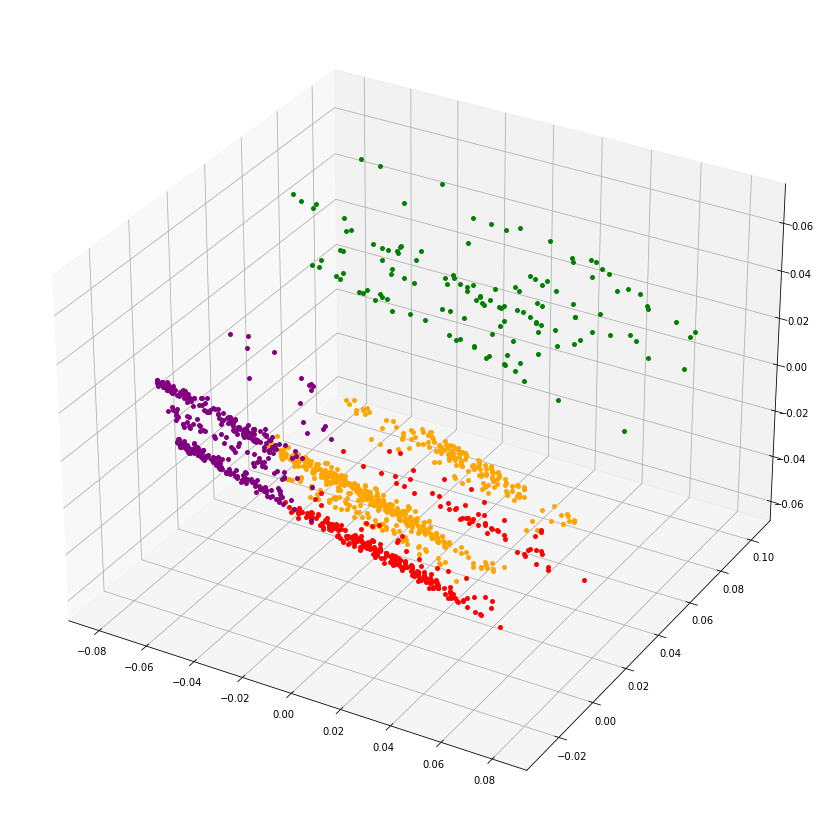

In [64]:
x, y, z = X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2] 

colors = {0: 'orange',
          1: 'red',
          2: 'green', 
          3: 'purple',
          4: 'blue',
          5: 'yellow'
            }

df = pd.DataFrame({'x': x, 'y':y, 'z':z, 'label':labels}) 
groups = df.groupby('label')

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection ='3d') 

for name, group in groups:
    ax.plot(group.x, group.y, group.z,marker='o', linestyle='', ms=5,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    

plt.show()

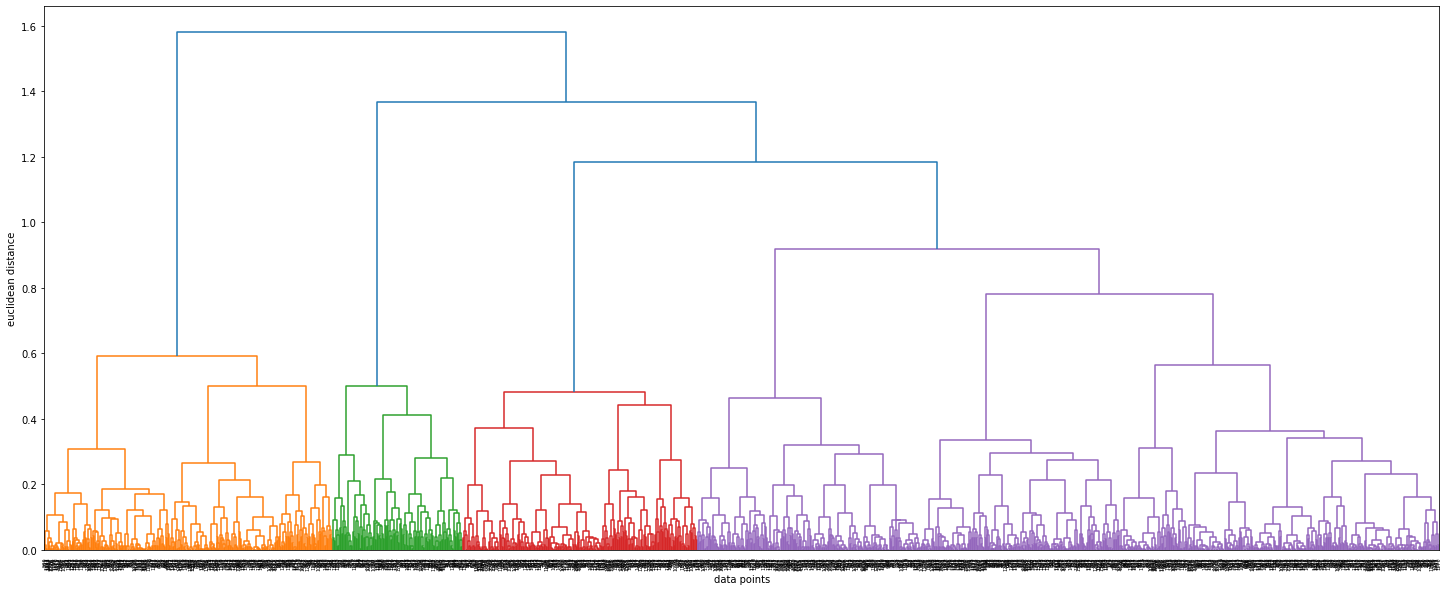

In [65]:
# Hierarchical Clustering

merg = linkage(scaled_data,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [66]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hierarchical_cluster.fit_predict(scaled_data)
labels=hierarchical_cluster.labels_

clusters=pd.concat([data, pd.DataFrame({'hierarchical_clusters':labels})], axis=1)
clusters.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year,Gender,hierarchical_clusters
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0,4
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,0,4
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,0,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,48,0,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,1,3


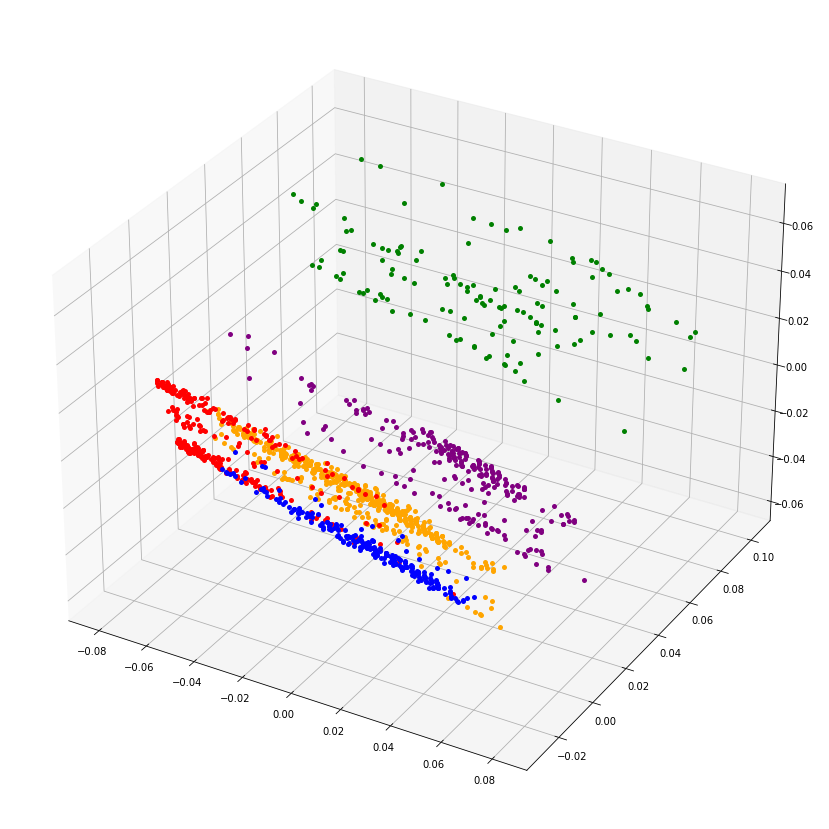

In [67]:
x, y, z = X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2] 

colors = {0: 'orange',
          1: 'red',
          2: 'green', 
          3: 'purple',
          4: 'blue',
          5: 'yellow'
            }

df = pd.DataFrame({'x': x, 'y':y, 'z':z, 'label':labels}) 
groups = df.groupby('label')

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection ='3d') 

for name, group in groups:
    ax.plot(group.x, group.y, group.z,marker='o', linestyle='', ms=5,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    

plt.show()